# William Craske

## Research question/interests

Finding the likelihood or trend of scoring when on a power play or down a player, compared to whether it's the winning goal.


In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns


nhlStats = pd.read_csv(r"..\data\raw\nhlStats.csv", low_memory = False)
nhlStats = nhlStats.dropna(how="any", axis = 0)
nhlStats



,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,...,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage,play_id,strength,gameWinningGoal,emptyNet
1,2.016020e+09,8473461.0,4.0,2011.0,0.0,0.0,0.0,11.0,9.0,1.0,...,10.0,1.0,L,81.818182,100.0,80.000000,2016020045_97,Even,False,False
2,2.016020e+09,8470645.0,16.0,3598.0,0.0,0.0,0.0,27.0,23.0,2.0,...,23.0,4.0,W,85.185185,50.0,91.304348,2016020045_103,Power Play,False,False
3,2.017021e+09,8468011.0,24.0,3696.0,0.0,0.0,0.0,33.0,30.0,1.0,...,28.0,2.0,W,90.909091,50.0,96.428571,2016020045_140,Power Play,False,False
4,2.017021e+09,8475215.0,7.0,3539.0,0.0,0.0,0.0,33.0,29.0,4.0,...,27.0,5.0,L,87.878788,80.0,88.888889,2016020045_197,Power Play,False,False
5,2.015020e+09,8473575.0,21.0,3600.0,0.0,0.0,0.0,21.0,20.0,3.0,...,17.0,3.0,W,95.238095,100.0,94.117647,2016020045_214,Even,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56649,2.018030e+09,8476412.0,19.0,3487.0,0.0,0.0,0.0,31.0,27.0,3.0,...,26.0,4.0,L,87.096774,75.0,88.461538,2009020965_5,Power Play,False,False
56650,2.018030e+09,8471695.0,6.0,3600.0,0.0,0.0,0.0,29.0,28.0,12.0,...,16.0,12.0,W,96.551724,100.0,93.750000,2009020965_7,Even,False,False
56651,2.018030e+09,8476412.0,19.0,3487.0,0.0,0.0,0.0,31.0,27.0,3.0,...,26.0,4.0,L,87.096774,75.0,88.461538,2009020965_10,Even,True,False
56652,2.018030e+09,8476412.0,19.0,3600.0,0.0,0.0,0.0,33.0,32.0,3.0,...,30.0,3.0,W,96.969697,100.0,96.666667,2009020751_2,Even,False,False


# Milestone 3
## Task 1

In [2]:
nhlStats.head()


,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,...,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage,play_id,strength,gameWinningGoal,emptyNet
1,2.016020e+09,8473461.0,4.0,2011.0,0.0,0.0,0.0,11.0,9.0,1.0,...,10.0,1.0,L,81.818182,100.0,80.000000,2016020045_97,Even,False,False
2,2.016020e+09,8470645.0,16.0,3598.0,0.0,0.0,0.0,27.0,23.0,2.0,...,23.0,4.0,W,85.185185,50.0,91.304348,2016020045_103,Power Play,False,False
3,2.017021e+09,8468011.0,24.0,3696.0,0.0,0.0,0.0,33.0,30.0,1.0,...,28.0,2.0,W,90.909091,50.0,96.428571,2016020045_140,Power Play,False,False
4,2.017021e+09,8475215.0,7.0,3539.0,0.0,0.0,0.0,33.0,29.0,4.0,...,27.0,5.0,L,87.878788,80.0,88.888889,2016020045_197,Power Play,False,False
5,2.015020e+09,8473575.0,21.0,3600.0,0.0,0.0,0.0,21.0,20.0,3.0,...,17.0,3.0,W,95.238095,100.0,94.117647,2016020045_214,Even,False,False


In [3]:
nhlStats.shape



(46935, 23)

In [4]:
nhlStats.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'pim', 'shots', 'saves', 'powerPlaySaves', 'shortHandedSaves',
       'evenSaves', 'shortHandedShotsAgainst', 'evenShotsAgainst',
       'powerPlayShotsAgainst', 'decision', 'savePercentage',
       'powerPlaySavePercentage', 'evenStrengthSavePercentage', 'play_id',
       'strength', 'gameWinningGoal', 'emptyNet'],
      dtype='object')

In [5]:
nhlStats.nunique(axis=0)
nhlStats.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
count,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000
mean,2010693177.759412,8468058.344817,16.860083,3539.906594,0.022094,0.000192,0.090785,29.346096,26.775498,4.549142,0.825972,21.399787,0.902141,23.219708,5.223479,90.666790,84.663853,91.621785
std,6061441.176228,7451.058408,11.083641,431.962762,0.148578,0.013846,0.593859,7.378900,7.378235,3.096832,1.069898,6.684599,1.128939,6.776589,3.277791,6.269778,22.013991,6.742545
min,2000020001.000000,8445275.000000,1.000000,196.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,20.000000,0.000000,0.000000
25%,2006020350.000000,8462052.000000,8.000000,3550.000000,0.000000,0.000000,0.000000,25.000000,22.000000,2.000000,0.000000,17.000000,0.000000,19.000000,3.000000,87.500000,75.000000,88.235294
50%,2011020585.000000,8470216.000000,16.000000,3600.000000,0.000000,0.000000,0.000000,29.000000,27.000000,4.000000,1.000000,21.000000,1.000000,23.000000,5.000000,91.666667,92.857143,92.592593
75%,2016021095.000000,8473575.000000,24.000000,3600.000000,0.000000,0.000000,0.000000,34.000000,31.000000,6.000000,1.000000,26.000000,1.000000,28.000000,7.000000,95.000000,100.000000,96.000000
max,2019030416.000000,8480925.000000,54.000000,9027.000000,2.000000,1.000000,27.000000,88.000000,85.000000,25.000000,15.000000,76.000000,15.000000,79.000000,28.000000,100.000000,100.000000,100.000000


In [6]:
nhlStats.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            56644, 56645, 56646, 56647, 56648, 56649, 56650, 56651, 56652,
            56654],
           dtype='int64', length=46935)

In [7]:
nhlStats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46935 entries, 1 to 56654
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   game_id                     46935 non-null  float64
 1   player_id                   46935 non-null  float64
 2   team_id                     46935 non-null  float64
 3   timeOnIce                   46935 non-null  float64
 4   assists                     46935 non-null  float64
 5   goals                       46935 non-null  float64
 6   pim                         46935 non-null  float64
 7   shots                       46935 non-null  float64
 8   saves                       46935 non-null  float64
 9   powerPlaySaves              46935 non-null  float64
 10  shortHandedSaves            46935 non-null  float64
 11  evenSaves                   46935 non-null  float64
 12  shortHandedShotsAgainst     46935 non-null  float64
 13  evenShotsAgainst            469

In [8]:
nhlStats.isnull().sum()

game_id                       0
player_id                     0
team_id                       0
timeOnIce                     0
assists                       0
goals                         0
pim                           0
shots                         0
saves                         0
powerPlaySaves                0
shortHandedSaves              0
evenSaves                     0
shortHandedShotsAgainst       0
evenShotsAgainst              0
powerPlayShotsAgainst         0
decision                      0
savePercentage                0
powerPlaySavePercentage       0
evenStrengthSavePercentage    0
play_id                       0
strength                      0
gameWinningGoal               0
emptyNet                      0
dtype: int64

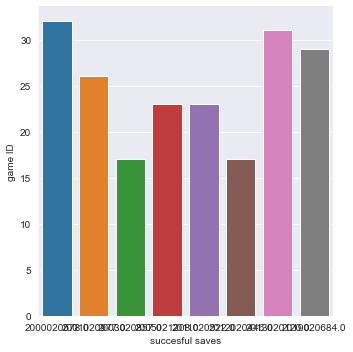

In [9]:
sns.set_style('darkgrid')

vis1 = sns.catplot(data = nhlStats[nhlStats['goals'] > 0], x='game_id', y = 'saves', kind = "bar")
vis1.set_axis_labels("succesful saves", "game ID")

#shows succesful saves in each game where there were more than 1 goal


<AxesSubplot:xlabel='evenShotsAgainst', ylabel='count'>

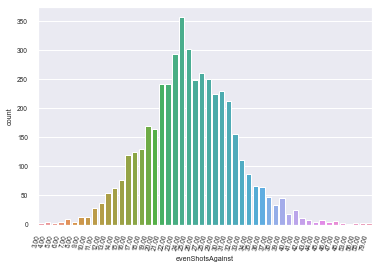

In [10]:
sns.set_theme(style="whitegrid")
sns.set(font_scale = .6)

vis2 = sns.countplot(data = nhlStats[nhlStats['game_id'] > 2.018030e+09], x='evenShotsAgainst')
vis2.set_xticklabels(vis2.get_xticklabels(), rotation=75, horizontalalignment='right')
vis2.set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in vis2.get_xticklabels()])
vis2
#shows average of shots against when even strength and after 2018

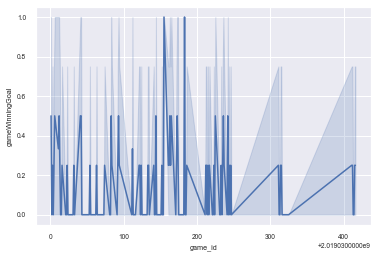

In [11]:
vis3 = sns.lineplot(data = nhlStats[nhlStats['game_id'] > 2.019030e+09], x='game_id', y = 'gameWinningGoal')

#graph of game winning goals after 2019

## Task 2

In [12]:
nhlStats = pd.read_csv(r"..\data\raw\nhlStats.csv", low_memory = False)

nhlStats = nhlStats.dropna(how="any", axis = 0)

nhlStats = nhlStats.rename(columns = {"game_id" : "gameID", "player_id" : "playerID",
                                      "team_id" : "teamID", "pim" : "penaltyMins",
                                      "shortHandedShotsAgainst" : "shShotsAgainst",
                                      "play_id" : "playID", "decision" : "result"})


nhlStats = nhlStats[['gameID','gameWinningGoal',
       'powerPlayShotsAgainst','goals','timeOnIce', 'assists',
       'penaltyMins', 'shots', 'saves', 'powerPlaySaves', 'shortHandedSaves',
       'evenSaves', 'shShotsAgainst', 'evenShotsAgainst', 'result', 'savePercentage',
       'powerPlaySavePercentage', 'evenStrengthSavePercentage', 'playID',
       'strength','emptyNet']]

nhlStats = nhlStats.sort_values(by=["gameID"], ascending = False)

nhlStats

,gameID,gameWinningGoal,powerPlayShotsAgainst,goals,timeOnIce,assists,penaltyMins,shots,saves,powerPlaySaves,...,evenSaves,shShotsAgainst,evenShotsAgainst,result,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage,playID,strength,emptyNet
50837,2.019030e+09,True,3.0,0.0,3493.0,0.0,0.0,29.0,27.0,2.0,...,23.0,2.0,24.0,L,93.103448,66.666667,95.833333,2011020546_169,Even,False
50836,2.019030e+09,False,3.0,0.0,3600.0,0.0,0.0,22.0,22.0,3.0,...,19.0,0.0,19.0,W,100.000000,100.000000,100.000000,2011020546_163,Even,False
50835,2.019030e+09,False,3.0,0.0,3493.0,0.0,0.0,29.0,27.0,2.0,...,23.0,2.0,24.0,L,93.103448,66.666667,95.833333,2011020546_143,Even,False
50834,2.019030e+09,False,3.0,0.0,3600.0,0.0,0.0,22.0,22.0,3.0,...,19.0,0.0,19.0,W,100.000000,100.000000,100.000000,2011020546_141,Even,False
50832,2.019030e+09,False,3.0,0.0,5350.0,0.0,0.0,41.0,39.0,3.0,...,36.0,0.0,38.0,W,95.121951,100.000000,94.736842,2011020546_8,Even,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38957,2.000020e+09,False,8.0,0.0,3600.0,0.0,0.0,30.0,26.0,8.0,...,17.0,1.0,21.0,L,86.666667,100.000000,80.952381,2010020921_301,Even,False
41309,2.000020e+09,False,15.0,0.0,3900.0,0.0,0.0,38.0,34.0,13.0,...,19.0,2.0,21.0,L,89.473684,86.666667,90.476190,2010020619_176,Even,False
41310,2.000020e+09,True,5.0,0.0,3900.0,0.0,0.0,33.0,29.0,3.0,...,23.0,3.0,25.0,W,87.878788,60.000000,92.000000,2010020619_320,Even,False
39728,2.000020e+09,False,10.0,0.0,3900.0,0.0,0.0,28.0,26.0,9.0,...,17.0,0.0,18.0,L,92.857143,90.000000,94.444444,2011020808_123,Even,False


## Task 3

In [13]:
def loadAndProcess(address):
    
    #method chain 1 - load data, deal with missing data
    df1 = (
        pd.read_csv(address, low_memory = False)
        .dropna(how="any", axis = 0)
        
    )
    
    #method chain 2 - rename columns, and sort by gameID
    df2 = (
        df1
        .rename(columns = {"game_id" : "gameID", "player_id" : "playerID",
                                      "team_id" : "teamID", "pim" : "penaltyMins",
                                      "shortHandedShotsAgainst" : "shortHandShotsAgainst",
                                      "play_id" : "playID", "decision" : "result"})
        .sort_values(by=["gameID"], ascending = False)
        
    )
    #method chain 3 - drop columns that wont be used in research question
    df3 = (
        df2.drop(['playerID', 'teamID', 'timeOnIce', 'goals', 'playID', 'emptyNet'], axis = 1)
    )
    return df3

loadAndProcess(r"..\data\raw\nhlStats.csv")
    


,gameID,assists,penaltyMins,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,result,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage,strength,gameWinningGoal
50837,2.019030e+09,0.0,0.0,29.0,27.0,2.0,2.0,23.0,2.0,24.0,3.0,L,93.103448,66.666667,95.833333,Even,True
50836,2.019030e+09,0.0,0.0,22.0,22.0,3.0,0.0,19.0,0.0,19.0,3.0,W,100.000000,100.000000,100.000000,Even,False
50835,2.019030e+09,0.0,0.0,29.0,27.0,2.0,2.0,23.0,2.0,24.0,3.0,L,93.103448,66.666667,95.833333,Even,False
50834,2.019030e+09,0.0,0.0,22.0,22.0,3.0,0.0,19.0,0.0,19.0,3.0,W,100.000000,100.000000,100.000000,Even,False
50832,2.019030e+09,0.0,0.0,41.0,39.0,3.0,0.0,36.0,0.0,38.0,3.0,W,95.121951,100.000000,94.736842,Even,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38957,2.000020e+09,0.0,0.0,30.0,26.0,8.0,1.0,17.0,1.0,21.0,8.0,L,86.666667,100.000000,80.952381,Even,False
41309,2.000020e+09,0.0,0.0,38.0,34.0,13.0,2.0,19.0,2.0,21.0,15.0,L,89.473684,86.666667,90.476190,Even,False
41310,2.000020e+09,0.0,0.0,33.0,29.0,3.0,3.0,23.0,3.0,25.0,5.0,W,87.878788,60.000000,92.000000,Even,True
39728,2.000020e+09,0.0,0.0,28.0,26.0,9.0,0.0,17.0,0.0,18.0,10.0,L,92.857143,90.000000,94.444444,Even,False


## Task 4


In [20]:
import WilliamNotebook_function

df = WilliamNotebook_function.loadAndProcess(r"..\data\raw\nhlStats.csv")


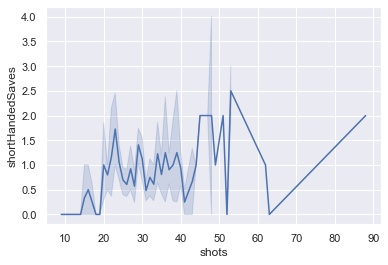

In [15]:
sns.set(font_scale = 1)
shSaves = sns.lineplot(data = df[df['gameID'] > 2.019030e+09], x='shots', y = 'shortHandedSaves')



The graph above depicts the trend current trend from 2019 to 2020 of the amount of shots compared to the amount of saves while short handed. This is a very **volatile** graph and is inconsistent. The only consistency is that the ratio of shots taken to short handed saves are 30:1. From this we can conclude that there are not as many saves happening while being down a player on the defending side.

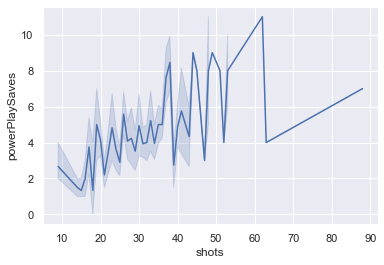

In [16]:
ppSaves = sns.lineplot(data = df[df['gameID'] > 2.019030e+09], x='shots', y = 'powerPlaySaves')

#this shows the trend of the amount of shots corresponding to 
#the amount of saves while having man advantage


However, this graph shown above displays the trend of the amount of shots corresponding to the amount of saves while having man advantage. This is a much more *linear* graph, and shows that having a man advantage increases your likelihood of a save.


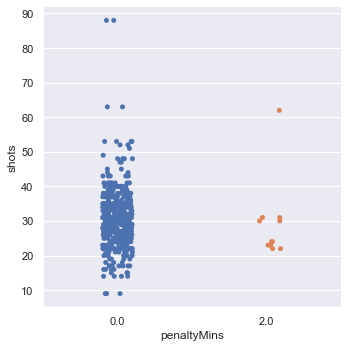

In [24]:
vis = sns.catplot(data = df[df['gameID'] > 2.019030e+09], x = "penaltyMins", y = "shots")


The graph depicted above shows us that far more shots taken against while the other team has a power play or a man advantage. This shows that penalties are frequently taken around 25 shots against. 

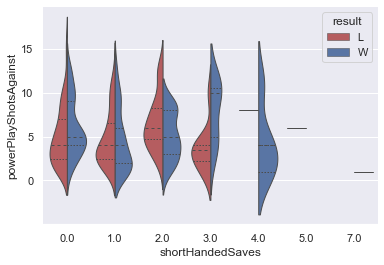

In [25]:
vio = sns.violinplot(data=df[df['gameID'] > 2.019030e+09],
                     x="shortHandedSaves", y="powerPlayShotsAgainst",
                     hue="result",
                     split=True, inner="quart", linewidth=1,
                     palette={"W": "b", "L": "r"})
sns.despine(left=True)

This last graph as depicted above compares the amount of shots on a power play, against the amount of saves shorthanded. The wins are relative to the goalie, so as there were more saves, it was far more likely for a win for the goalie's team. This is an **incredible** feat, as this shows a complete lockdown on the goalie's side, despite being one man down. For future additions to this dataset, I'd like to find which goalies were capable of performing this.